<a href="https://colab.research.google.com/github/SomValentino/pytorch/blob/main/Intro_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.3.0
aiohappyeyeballs                   2.4.6
aiohttp                            3.11.12
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.23
albumentations                     2.0.4
ale-py                             0.10.1
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.6.0
arviz                              0.20.0
astropy                            7.0.1
astropy-iers-data                  0.2025.2.10.0.33.26
astunparse                         1.6.3
atpublic                           4.1.0
attrs                              25.1.0
audioread          

In [ ]:
import torch
torch.zeros(2,3)

t = torch.tensor([0,1,2])

print(t)
print(t.dtype)

tensor([0, 1, 2])
torch.int64


In [2]:
import torch
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
my_torch = my_torch.reshape(2,5)
my_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [1]:
pip install ucimlrepo

In [31]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(X.head())

# variable information
print(y.head())


   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
         class
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa


In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x





In [5]:
torch.manual_seed(41)
model = Model()

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(X.head())
print(y.head())

#y = y.replace('Iris-setosa', 0.0)
#y = y.replace('Iris-versicolor', 1.0)
#y = y.replace('Iris-virginica', 2.0)

print(y['class'].value_counts())

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
         class
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [34]:
X = X.values
y = y.values.ravel()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)



In [37]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train).squeeze()
y_test = torch.LongTensor(y_test).squeeze()

In [38]:
# set criterion to measure the error of our model
criterion = nn.CrossEntropyLoss()
# set the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [46]:
# Train the model
epochs = 100
losses = []
for epoch in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    if epoch % 10 == 0:
        print(f'Epoch: {epoch} Loss: {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 0.0056514921598136425
Epoch: 10 Loss: 0.005383690353482962
Epoch: 20 Loss: 0.0051404815167188644
Epoch: 30 Loss: 0.004920113366097212
Epoch: 40 Loss: 0.00475504994392395
Epoch: 50 Loss: 0.0055480594746768475
Epoch: 60 Loss: 0.00460828747600317
Epoch: 70 Loss: 0.004271319136023521
Epoch: 80 Loss: 0.004032569471746683
Epoch: 90 Loss: 0.003866100450977683


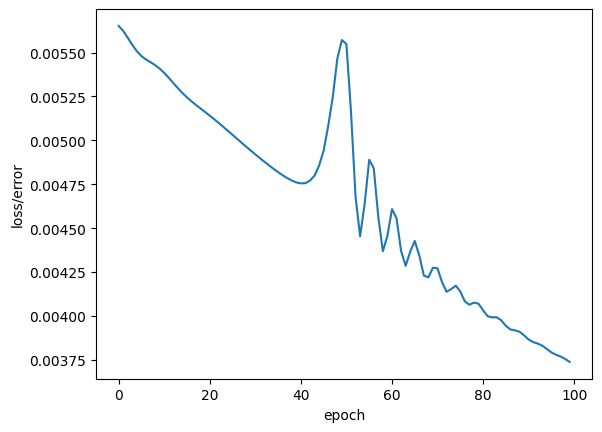

In [47]:
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('epoch')
plt.show()